##ADF Test

Let’s run the ADF test on the a10 dataset from the fpp package from R. This dataset counts the total monthly scripts for pharmaceutical products falling under ATC code A10. The original source of this dataset is the Australian Health Insurance Commission.

As see earlier, the null hypothesis of the test is the presence of unit root, that is, the series is non-stationary.

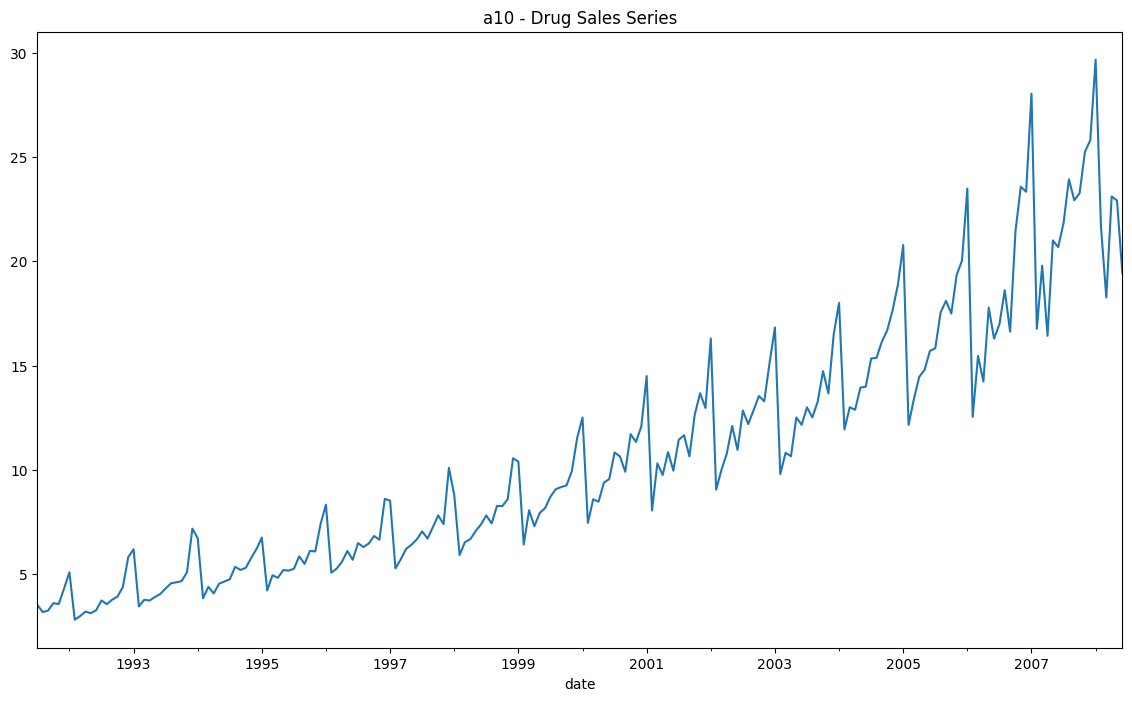

In [ ]:
# Setup and Import data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series');

In [ ]:
# ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930673
n_lags: 1.0
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

In [ ]:
# ADF test on random numbers
series = np.random.randn(100)
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -9.33469366806223
p-value: 9.129389935741112e-16
Critial Values:
   1%, -3.498198082189098
Critial Values:
   5%, -2.891208211860468
Critial Values:
   10%, -2.5825959973472097


The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

Let’s visualise the series as well to confirm.

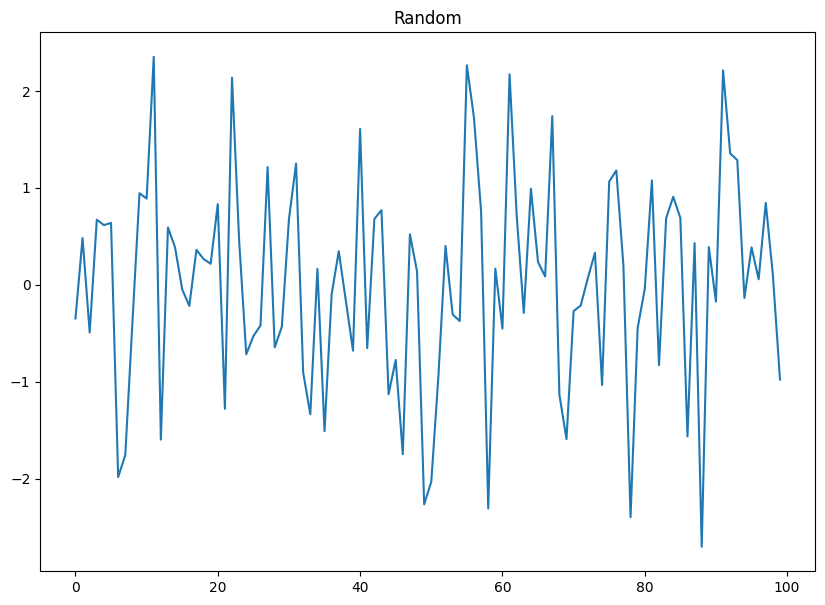

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(series);
plt.title('Random');